
```

       action a ~ pi(s)
       --------------->
       |              |
agent  |              |. world
       |              |
       <---------------
        reward r'
        next state s' ~ p(s,a,s')

the predicted value of state s is the maximum value of expected return of any action.

the predicted value of action a at state s is the expected reward plus the maximum return of any action.

- MC for episodic case
N[s] = N[s] + 1
V[s] = V[s] + ([Gt - V[s]) / N[s]
for evaluation

- TD(0) for general case
V[s] = V[s] + alpha * (r + gamma * V[s'] - V[s])
for evaluation

- TD(lambda) for general case
V[s] = V[s] + alpha * (Gt - V[s])
Gt = (1-lambda)Gt1 + (1-lambda)*lambda*Gt2 + ...
Gt1 = r + gamma*V[s']
Gt2 = r + gamma*r' + gamma**2 * v[s'']
Gt3 = r + gamma*r' + gamma**2 * r'' + gamma**3 * v[s''']
for evalution

- Q learning
Q[s,a] = Q[s,a] + alpha * (r + gamma* max(Q(s',a') for a') - Q[s,a])
for evaluation, control

def Q_learn(s,a,r,s',Q)
    td_target = r + gamma * max(Q(s',a')) for any a'
    td_error = td_target - Q(s,a)
    Q(s,a) += alpha * td_error

```
    

In [ ]:
import numpy as np

# Q
q = np.matrix(np.zeros([6, 6]))

# Reward
r = np.matrix([
[-1, -1, -1, -1,  0,  -1],
[-1, -1, -1,  0, -1, 100],
[-1, -1, -1,  0, -1,  -1],
[-1,  0,  0, -1,  0,  -1],
[ 0, -1, -1,  0, -1, 100],
[-1,  0, -1, -1,  0, 100]])

alpha = 0.5
gamma = 0.8
epsilon = 0.4

# the main training loop
for episode in range(101):
  # random initial state
  state = np.random.randint(0, 6)
  # if not final state
  while (state != 5):
    # choose a possible action
    # Even in random case, we cannot choose actions whose r[state, action] = -1.
    possible_actions = []
    possible_q = []
    for action in range(6):
      if r[state, action] >= 0:
        possible_actions.append(action)
        possible_q.append(q[state, action])
    # Step next state, here we use epsilon-greedy algorithm.
    action = -1
    if np.random.random() < epsilon:
      # choose random action
      action = possible_actions[np.random.randint(0, len(possible_actions))]
    else:
      # greedy
      action = possible_actions[np.argmax(possible_q)]
    # Update Q value
    q[state, action] += r[state, action] + gamma * q[action].max() - q[state, action]
    # Go to the next state
    state = action
  # Display training progress
  if episode % 10 == 0:
    print("------------------------------------------------")
    print("Training episode: %d" % episode)
    print(q)

------------------------------------------------
Training episode: 0
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]
------------------------------------------------
Training episode: 10
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0.]
 [  0.  80.   0.   0.  80.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]
------------------------------------------------
Training episode: 20
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [ 64.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.    0.    0.    0. ]]
------------------------------------------------
Training episode: 30
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    

```
DQN for carpole
link: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

design
agent
policy network
  __call__(state) -> [q(s,a1), ...]
target network
  __call__(state) -> {q(s,a1), ...]

env
state := pos, speed, angle, angular speed
action := left, right
reset() -> initial state
step(action) -> reward, new state, terminated, stopped


train
hyperparameters
  epsilon
  batch_size
  tao
  gamma
  lr

experience_history
loss_function
optimizer

for each episode
  state = env.reset()
  while True:
    # agent act
    if random.rand() < epsilon:
      action = env.action_space.random()
    else:
      action = policy(state).argmax()

    # environment respond
    reward, new_state, terminated, stopped = env.step(action)
    experience_history.append(state, action, reward, new_state, terminated)
    
    
    # train
    train_states,train_actions,train_rewards,train_new_states,train_terminated
      = experience_history.sample(batch_size)
    
    target_qs = train_rewards + gamma * target_network(train_new_states)
    pred_qs = policy_network(train_states)

    loss = loss_function(pred_qs, target_qs)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # update target policy
    target_network.state_dict +=
         tao * (policy_network.state_dict - target_network.state_dict)

    if terminated or stopped:
       break
  
```

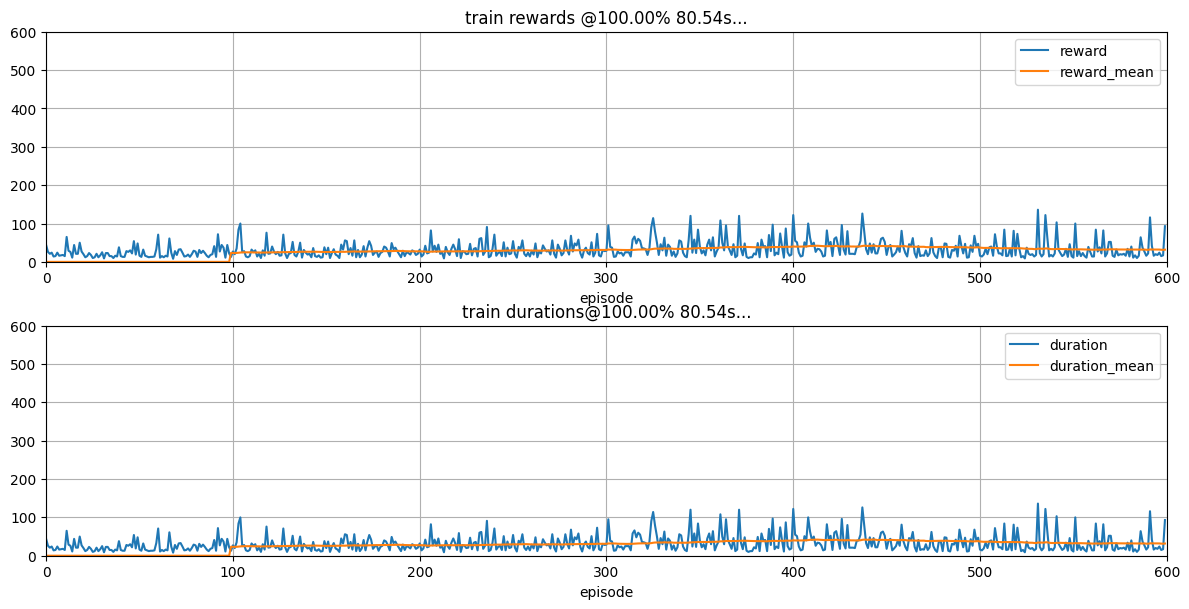

In [84]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, deque
from itertools import count
import math,random
import gymnasium as gym
from itertools import count
import time

if 'inline' in matplotlib.get_backend():
  from IPython import display
plt.ioff()
plt.figure(figsize=(12,6))

def show_progress(episode_rewards, episode_durations, run_len, num_episodes, elapsed_time_sec):
  plt.clf()

  plt.subplot(211)
  plt.tight_layout()
  plt.grid(True)
  plt.xlabel('episode')
  plt.xlim(0,num_episodes)
  plt.ylim(0,600)
  plt.plot(episode_rewards, label='reward')
  if run_len <= len(episode_rewards):
    plt.plot(torch.cat([torch.zeros(run_len-1),
                        torch.tensor(episode_rewards,dtype=torch.float).unfold(0, run_len, 1).mean(-1)]),
            label='reward_mean')
  plt.title(f'train rewards @{len(episode_rewards)/num_episodes*100:.2f}% {elapsed_time_sec:.2f}s...')
  plt.legend()

  plt.subplot(212)
  plt.tight_layout()
  plt.grid(True)
  plt.xlabel('episode')
  plt.xlim(0,num_episodes)
  plt.ylim(0,600)
  plt.plot(episode_durations, label='duration')
  if run_len <= len(episode_durations):
    plt.plot(torch.cat([torch.zeros(run_len-1),
                        torch.tensor(episode_durations,dtype=torch.float).unfold(0, run_len, 1).mean(-1)]),
             label='duration_mean')
  plt.title(f'train durations@{len(episode_durations)/num_episodes*100:.2f}% {elapsed_time_sec:.2f}s...')
  plt.legend()

  display.clear_output(wait=True)
  display.display(plt.gcf())

device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

env = gym.make("CartPole-v1")

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'terminated'))

class ExperienceHistory():
  def __init__(self, max_history):
    self.data = deque([], maxlen=max_history)

  def append(self, *args):
    self.data.append(Transition(*args))

  def sample(self, batch_size):
    return random.sample(self.data, batch_size)


class DQN(nn.Module):
  def __init__(self, len_state, num_hidden, len_action):
    super(DQN, self).__init__()
    self.ln1 = nn.Linear(len_state, num_hidden)
    self.relu1 = nn.ReLU()
    self.ln2 = nn.Linear(num_hidden, num_hidden)
    self.relu2 = nn.ReLU()
    self.ln3 = nn.Linear(num_hidden, len_action)

  def forward(self,x):
    x = self.relu1(self.ln1(x))
    x = self.relu2(self.ln2(x))
    return self.ln3(x)

# hyperparamers
max_history = 10000
len_state = env.observation_space.shape[0]
num_hidden = 128
len_action = env.action_space.n
learning_rate = 1e-4
num_episodes = 600
epsilon = {'start':1.0, 'end':0.05, 'decay':1000}
gamma = 0.99
batch_size = 128
tao = 5e-3

# agent
policy_net = DQN(len_state, num_hidden, len_action)
target_net = DQN(len_state, num_hidden, len_action)
history = ExperienceHistory(max_history)
loss_fn = nn.SmoothL1Loss()
optimizer = torch.optim.AdamW(policy_net.parameters(), lr = learning_rate)
episode_rewards = []
episode_durations = []
run_len = 100

start_time = time.time()
def train():
  for k in range(num_episodes):
    state, _ = env.reset()
    episode_reward = 0
    for step in count(0,1):
      # agent act
      if random.random() < epsilon['end'] + (epsilon['start'] - epsilon['end']) * np.exp(-1 * k / epsilon['decay']):
        action = env.action_space.sample().item()
      else:
        with torch.no_grad():
          action = policy_net(torch.tensor(state)).max(dim=0).indices.item()
      # env respond
      new_state, reward, terminated, truncated, info = env.step(action)
      episode_reward += reward
      history.append(state, action, new_state, reward, terminated) # experience history
      # train
      if len(history.data) < batch_size:
        if terminated or truncated:
          #print(terminated, truncated)
          break
        else:
          continue
      transitions = history.sample(batch_size)
      states, actions, new_states, rewards, terminateds = list(zip(*transitions))

      states = torch.tensor(states)
      actions = torch.tensor(actions)
      new_states = torch.tensor(new_states)
      rewards = torch.tensor(rewards)
      terminateds = torch.tensor(terminateds)

      # targets
      with torch.no_grad():
        q_target = rewards + target_net(new_states).max(dim=1).values.masked_fill(terminateds, 0)

      # preds
      q_pred = policy_net(states).gather(1, actions.view(-1,1)).view(-1)

      # optimize
      loss = loss_fn(q_pred, q_target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # update target
      target_state_dict = target_net.state_dict()
      policy_state_dict = policy_net.state_dict()
      for key in policy_state_dict:
        target_state_dict[key] += tao * (policy_state_dict[key] - target_state_dict[key])
      target_net.load_state_dict(target_state_dict)

      if terminated or truncated:
        break
      else:
        state = new_state
    episode_rewards.append(episode_reward)
    episode_durations.append(step+1)

    if (k+1) % 100 == 0:
      print(k, episode_reward)
      show_progress(episode_rewards, episode_durations, run_len, num_episodes, time.time()-start_time)

train()
#plt.plot(episode_rewards)